In [1]:
from koopman_probabilistic import *
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
x = np.load("energy_data.npy")

In [3]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
x = np.transpose(np.array([all_data["ISONE CA"]["DEMAND"], all_data["ISONE CA"]["DewPnt"], all_data["ISONE CA"]["DryBulb"]], dtype=np.float32))

In [4]:
mean = np.mean(x, axis=0)
rnge = np.max(x, axis=0) - np.min(x, axis=0)
x = (x - np.matlib.repmat(mean, x.shape[0], 1)) / np.matlib.repmat(rnge, x.shape[0], 1)

In [3]:
data_name = "energy_data"

predict_through = x.shape[0]
train_through = 1 * 365 * 24
xt = x[:train_through, :]

num_mu = 4
num_sig = 4
num_fourier = 3
mu_file = "forecasts//" + data_name + f"_{num_mu}mu.npy"
sigma_file = "forecasts//" + data_name + f"_{num_sig}sigma.npy"

In [4]:
model = FullyConnectedNLL(x_dim=xt.shape[1], num_freqs_mu=num_mu, num_freqs_sigma=num_sig, n=512)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier)
k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.24])

tensor([0.2618, 0.0374, 0.0007])

In [5]:
k.fit(xt, iterations=150, interval=20, verbose=True, cutoff=80, weight_decay=1e-100, lr_theta=1e-2, lr_omega=1e-9)
mu_hat, sigma_hat = k.predict(predict_through)
np.save(mu_file, mu_hat)
np.save(sigma_file, sigma_hat)

Setting 3 to 2.0000761067587556
Setting 7 to 49468.0
Iteration  0
tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 4.9468e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 4.9468e+04], grad_fn=<MulBackward0>)
Loss:  937.5085198356758
Iteration  1
tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 4.9468e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 4.9468e+04], grad_fn=<MulBackward0>)
Loss:  921.0883362281627
Iteration  2
tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 4.9468e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 4.9468e+04], grad_fn=<MulBackward0>)
Loss:  879.8558681569153
Iteration  3
tensor([2.400

Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3451e+04, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 2.0001e+00], grad_fn=<MulBackward0>)
Loss:  1.943824065845008
Iteration  27
tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3451e+04, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 2.0001e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3453e+04, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 2.0001e+00], grad_fn=<MulBackward0>)
Loss:  1.9379264861662062
Iteration  28
tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3453e+04, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 2.0001e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3455e+04, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 2.0001e+00], grad_fn=<MulBackward0>)
Loss:  1.9325608881231857
Iteration  29
tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3455e+04, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 2.0001e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7658e+03, 9.3457e+04,

Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7659e+03, 4.0000e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 8.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.9053934939974821
Iteration  54
tensor([2.4000e+01, 1.6800e+02, 8.7659e+03, 4.0000e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 8.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7660e+03, 4.0000e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 8.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.9048767601787397
Iteration  55
tensor([2.4000e+01, 1.6800e+02, 8.7660e+03, 4.0000e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 8.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7660e+03, 4.0000e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 8.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.9043949841773733
Iteration  56
tensor([2.4000e+01, 1.6800e+02, 8.7660e+03, 4.0000e+00, 2.4000e+01, 1.6800e+02,
        8.7658e+03, 8.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7660e+03, 4.0000e+00

Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7662e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7660e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.8176735881094273
Iteration  81
tensor([2.4000e+01, 1.6800e+02, 8.7662e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7660e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7663e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7660e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.813194306300386
Iteration  82
tensor([2.4000e+01, 1.6800e+02, 8.7663e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7660e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7663e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7660e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.8090333922195883
Iteration  83
tensor([2.4000e+01, 1.6800e+02, 8.7663e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7660e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7663e+03, 2.1819e+00,

Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7671e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7664e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.780823112270903
Iteration  108
tensor([2.4000e+01, 1.6800e+02, 8.7671e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7664e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7671e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7664e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.7803994191870003
Iteration  109
tensor([2.4000e+01, 1.6800e+02, 8.7671e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7664e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7671e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7664e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.77998701673755
Iteration  110
tensor([2.4000e+01, 1.6800e+02, 8.7671e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7664e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7672e+03, 2.1819e+00

Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7679e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7670e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.772392930410339
Iteration  135
tensor([2.4000e+01, 1.6800e+02, 8.7679e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7670e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7680e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7670e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.7721224139363485
Iteration  136
tensor([2.4000e+01, 1.6800e+02, 8.7680e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7670e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7680e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7670e+03, 2.0000e+00], grad_fn=<MulBackward0>)
Loss:  1.771852218555062
Iteration  137
tensor([2.4000e+01, 1.6800e+02, 8.7680e+03, 2.1819e+00, 2.4000e+01, 1.6800e+02,
        8.7670e+03, 2.0000e+00])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 8.7680e+03, 2.1819e+0

<IPython.core.display.Javascript object>


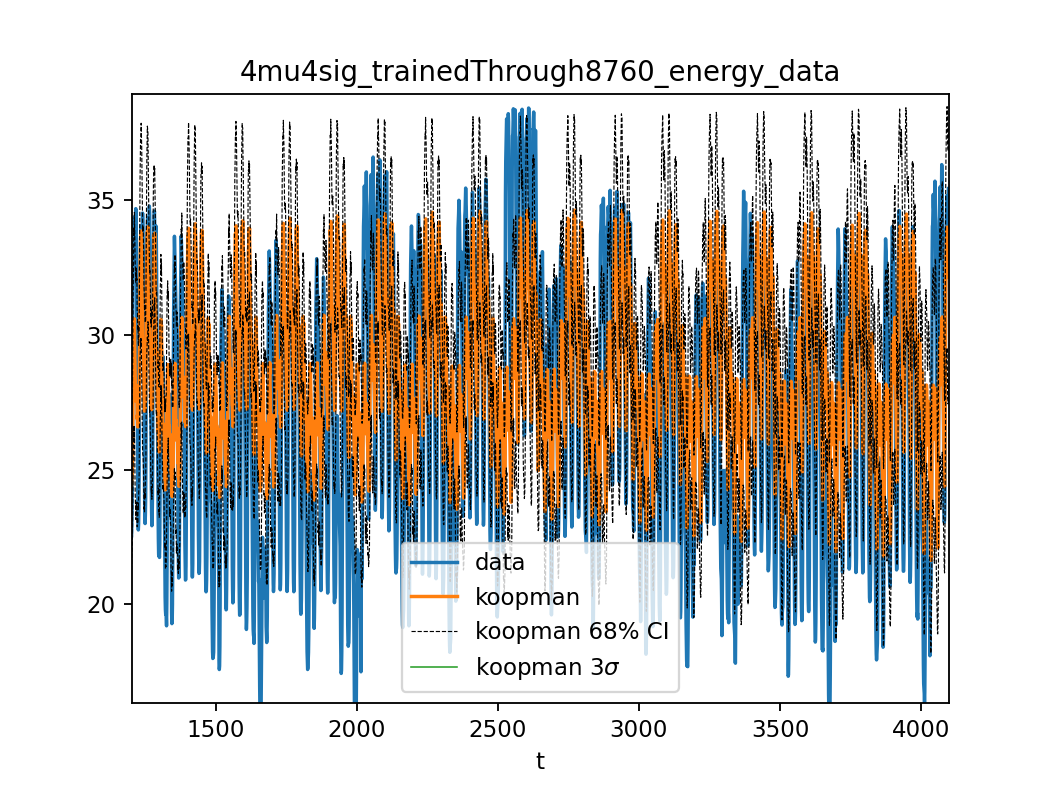

In [6]:
# print("SEED:", seed)
%matplotlib notebook
# slc = -2400
for dim in range(1):
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mu_hat[:, dim], label="koopman")
    plt.plot(mu_hat[:, dim] + sigma_hat[:, dim], "--", color="black", label="koopman 68% CI", linewidth=0.5)
    plt.plot(mu_hat[:, dim] - sigma_hat[:, dim], "--", color="black", linewidth=0.5)

    # plt.plot(mu_vec[slc:], label="real mu")
    # plt.plot(mu_hat[slc:, 0], label="koopman mu")
    # plt.legend()
    # plt.show()
    #
    # plt.plot(sigma_vec[slc:], label="real sigma")
    plt.plot(3*sigma_hat, label="koopman $3\sigma$", linewidth=0.7)
    plt.title(f"{num_mu}mu{num_sig}sig_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

In [15]:
mu_hat.shape

(9640, 3)

In [7]:
type(xt)

numpy.ndarray

In [53]:
def pinball_loss(data, mus, sigmas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q/100
            if q == 0.5:
                print(quant_pred, data[i])
            quant_pred = mus[i] + sigmas[i] * norm.ppf(q)
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data))

mus = mu_hat[:, 0] * rnge[0] + mean[0]
sigmas = sigma_hat[:, 0] * rnge[0]
# x = x[train_through:train_through + 720, 0] * rnge[0] + mean[0]
print(rnge)
print(mean)

pinball_loss(x, mus[train_through:train_through + 720], sigmas[train_through:train_through + 720])

[1. 1. 1.]
[-1.4892390e-07  1.6343780e-07  4.0236596e-08]
-0.10909090163535332 -0.07769873
-0.12493122619691938 -0.115170985
-0.1455837600923926 -0.14069046
-0.1630066743194753 -0.1536015
-0.15627149104869179 -0.15546754
-0.10407337933172803 -0.1473477
-0.025391175676196344 -0.12883852
0.019551604395652063 -0.1086146
0.043586088506068 -0.07189885
0.05417401114292593 -0.029383212
0.06214927175495973 0.0017343982
0.06289374804351712 0.02014271
0.05960767688366102 0.03043119
0.05055307390318298 0.025589552
0.04260516284509087 0.017520156
0.014317857570094253 0.023067866
-0.04167043458150588 0.08303357
-0.12015573808656717 0.13967066
-0.16330072446091462 0.13165168
-0.17072211890167202 0.10971302
-0.15168676678728993 0.082226634
-0.12753689297206816 0.036886707
-0.10519731899729595 -0.018539961
-0.09655892630031354 -0.07749699
-0.10186549784616301 -0.123896025
-0.11730522129070231 -0.15087807
-0.13563267651030406 -0.16424301
-0.1497701807921461 -0.16747077
-0.13400523228431388 -0.15894747


0.07148294775985055 0.072240755
0.06077098174975052 0.062254876
0.04621745632565388 0.055950657
0.031053427652577383 0.04732649
0.0007779852578770827 0.047528226
-0.05818539629044843 0.090396896
-0.13197136040279372 0.16619879
-0.18224983062354372 0.16836745
-0.18579359827899938 0.14743744
-0.1656239964850176 0.1125373
-0.13703290143426686 0.0570602
-0.11255771361289965 -0.021969454
-0.0981479532576178 -0.09550183
-0.10258935624632429 -0.1408922
-0.1167349976615175 -0.16293173
-0.1365140962858471 -0.17211068
-0.15244078636799965 -0.17105156
-0.14784585551573393 -0.1551145
-0.09731173456316643 -0.09378709
-0.02111116193575037 0.020647047
0.022011725597503192 0.08716914
0.042537621248483724 0.094835065
0.050722174994432837 0.09377596
0.05622226510206686 0.09357422
0.053256117401863846 0.08868215
0.04417883125246406 0.07708239
0.03007304878686348 0.07143381
0.016834684248072336 0.06321312
-0.015116158689850695 0.065936536
-0.0772619100586186 0.1072922
-0.14861900709285758 0.15207735
-0.18

0.07131070590379898 0.101694055
0.09436846161300436 0.12711266
0.1054234400540593 0.14652964
0.10936034496410478 0.16312234
0.11085980569546278 0.16766137
0.1080911208788767 0.15898676
0.10081384533595134 0.15157302
0.09066361854528888 0.14027585
0.06398956364805944 0.13311426
0.006969343088155812 0.16367711
-0.070329482049979 0.23070353
-0.1318647739075089 0.22898878
-0.1483347964079586 0.19837551
-0.13537638000174368 0.15273298
-0.11245199665161917 0.08479875
-0.09191555631739406 0.002339603
-0.08275943202733252 -0.06892326
-0.08637605328017668 -0.11365797
-0.09955426989184765 -0.13519318
-0.11614504573136533 -0.14336345
-0.12361245024269363 -0.14205217
-0.0999955131468685 -0.12374472
-0.02423024390014457 -0.062366873
0.0534282575315554 0.05368114
0.0971672058680639 0.11379815
0.1178582766549709 0.1158155
0.12725960686279053 0.11142776
0.1277820272780262 0.10825044
0.12750409607077742 0.099626265
0.12160008727488954 0.087017834
0.11176504889058304 0.08025972
0.09782894380884047 0.070

0.30454576913199305

In [ ]:
plt.figure()
plt.plot(mu_vec, label="real $\mu$")
plt.plot(mu_hat[:, 0], "--", label="koopman $\mu$")
plt.xlabel("t")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


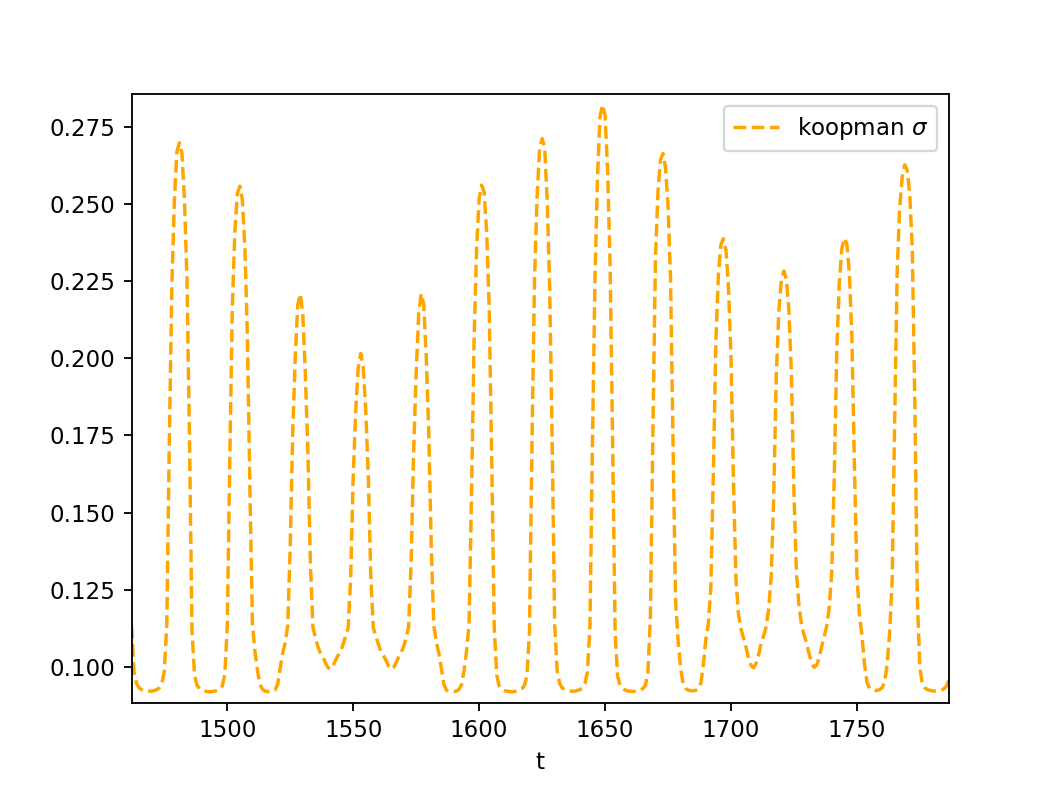

In [13]:
plt.figure()
# plt.plot(sigma_vec, color="blue", label="real $\sigma$")
plt.plot(sigma_hat[:, 0], "--", color="orange", label="koopman $\sigma$")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# Construct pdf quantiles
# REMOVE
sigma = 1 * np.cos(2 * np.pi / 36 * np.arange(5000) + 1.5) + 4

num_quantiles = 100
domain = [min(mu_hat[:,0] - 2.5*sigma), max(mu_hat[:,0] + 2.5*sigma)]
x_axis = np.linspace(domain[0], domain[1], num_quantiles)

In [ ]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
verts = []
ts = range(4970, 5000, 2)
for t in ts:
    z = normal_pdf(mu_hat[t], sigma[t], x_axis)
    plt.plot(x_axis, t*np.ones(num_quantiles), z)
    verts.append(polygon_under_graph(x_axis, z))

plt.plot(mu_hat[4970:5000:2, 0], ts, np.zeros(len(ts)))

# poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
# ax.add_collection3d(poly, zs=ts, zdir='y')
plt.xlabel("x")
plt.ylabel("t")
ax.set_zlabel("probability density")


plt.show()

In [6]:
help(np.concatenate)

Help on function concatenate in module numpy:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None)
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  If axis is None,
        arrays are flattened before use.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    
    Returns
    -------
    res : ndarray
        The concatenated array.
    
    See Also
    --------
    ma.concatenate : Concatenate function that preserves input masks.
    array_split : Split an array into multiple sub-arrays of equal or
   